In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Step 2: Load and explore the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (200, 5)


In [4]:
print("First 5 rows:")
df.head()

First 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print("Basic Statistics:")
df.describe()

Basic Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


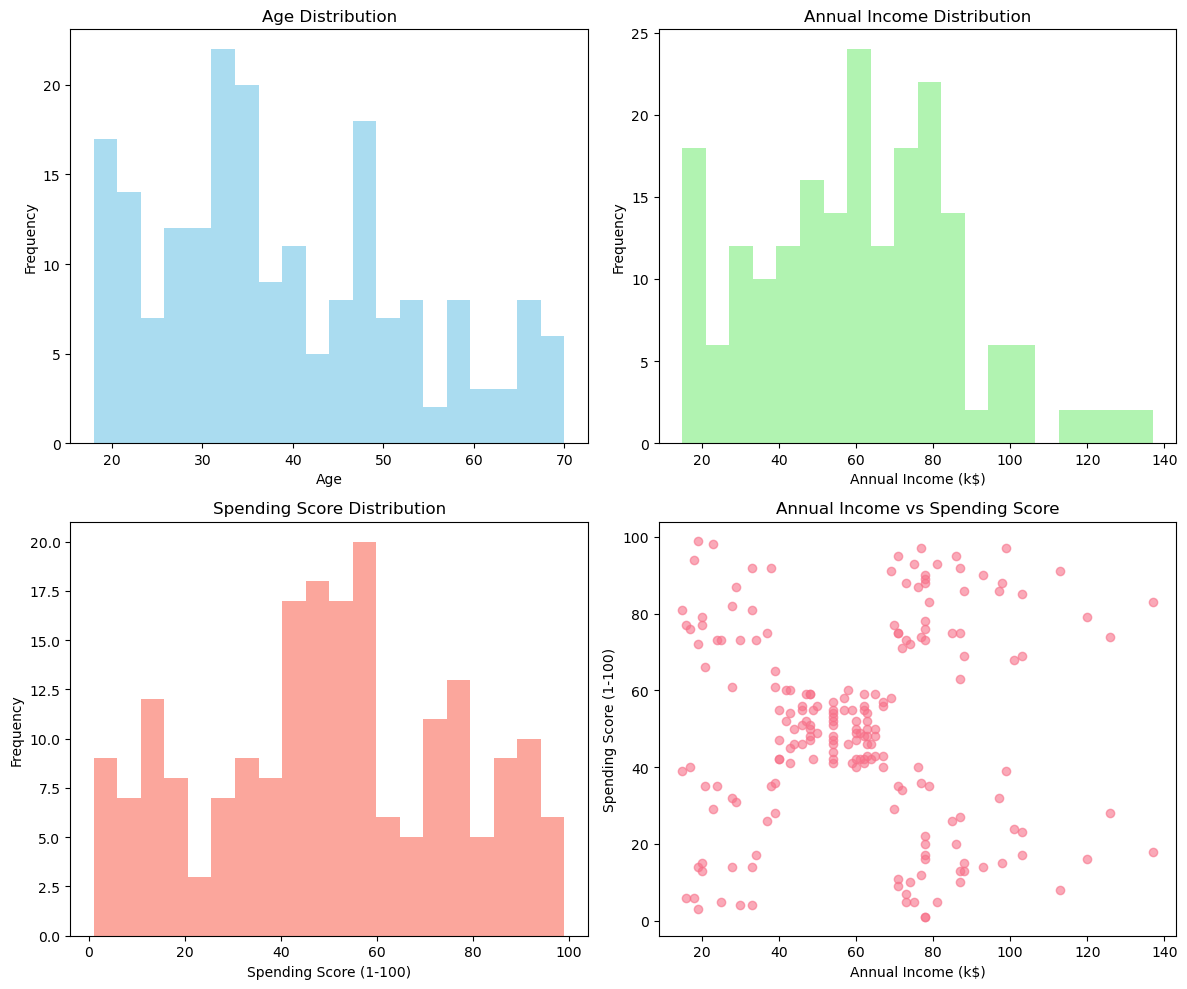


Selected features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Feature matrix shape: (200, 3)


In [8]:
# Step 3: Visualize the data and select features for clustering

# Create subplots to visualize the distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age distribution
axes[0,0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Annual Income distribution
axes[0,1].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income (k$)')
axes[0,1].set_ylabel('Frequency')

# Spending Score distribution
axes[1,0].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon')
axes[1,0].set_title('Spending Score Distribution')
axes[1,0].set_xlabel('Spending Score (1-100)')
axes[1,0].set_ylabel('Frequency')

# Scatter plot: Annual Income vs Spending Score
axes[1,1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
axes[1,1].set_title('Annual Income vs Spending Score')
axes[1,1].set_xlabel('Annual Income (k$)')
axes[1,1].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Select features for clustering (excluding CustomerID and Gender)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()
print(f"\nSelected features for clustering: {features}")
print(f"Feature matrix shape: {X.shape}")

Original feature statistics:
          Age  Annual Income (k$)  Spending Score (1-100)
count  200.00              200.00                  200.00
mean    38.85               60.56                   50.20
std     13.97               26.26                   25.82
min     18.00               15.00                    1.00
25%     28.75               41.50                   34.75
50%     36.00               61.50                   50.00
75%     49.00               78.00                   73.00
max     70.00              137.00                   99.00

Scaled feature statistics:
          Age  Annual Income (k$)  Spending Score (1-100)
count  200.00              200.00                  200.00
mean    -0.00               -0.00                   -0.00
std      1.00                1.00                    1.00
min     -1.50               -1.74                   -1.91
25%     -0.72               -0.73                   -0.60
50%     -0.20                0.04                   -0.01
75%      0.73  

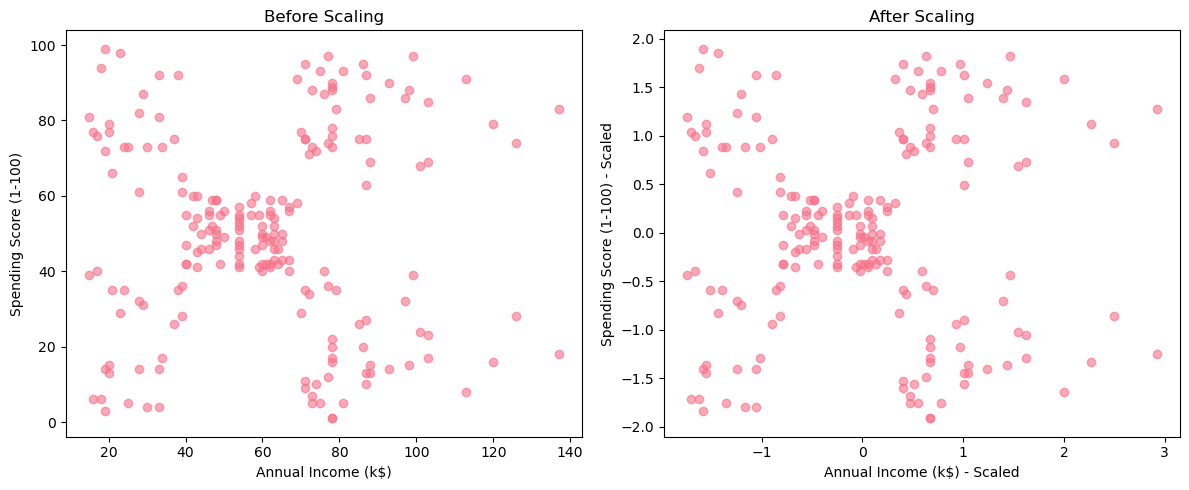

In [10]:
# Step 4: Scale the features for better K-Means performance
# K-Means is sensitive to feature scales, so we need to standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("Original feature statistics:")
print(X.describe().round(2))
print("\nScaled feature statistics:")
print(X_scaled_df.describe().round(2))

# Quick visualization to show the effect of scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before scaling
ax1.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.6)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')

# After scaling
ax2.scatter(X_scaled_df['Annual Income (k$)'], X_scaled_df['Spending Score (1-100)'], alpha=0.6)
ax2.set_title('After Scaling')
ax2.set_xlabel('Annual Income (k$) - Scaled')
ax2.set_ylabel('Spending Score (1-100) - Scaled')

plt.tight_layout()
plt.show()

Calculating WCSS for different values of K using manual implementation...
K=1: WCSS=600.00
K=2: WCSS=389.39
K=3: WCSS=304.98
K=4: WCSS=205.23
K=5: WCSS=168.25
K=6: WCSS=133.87
K=7: WCSS=117.08
K=8: WCSS=104.84
K=9: WCSS=94.86
K=10: WCSS=84.28


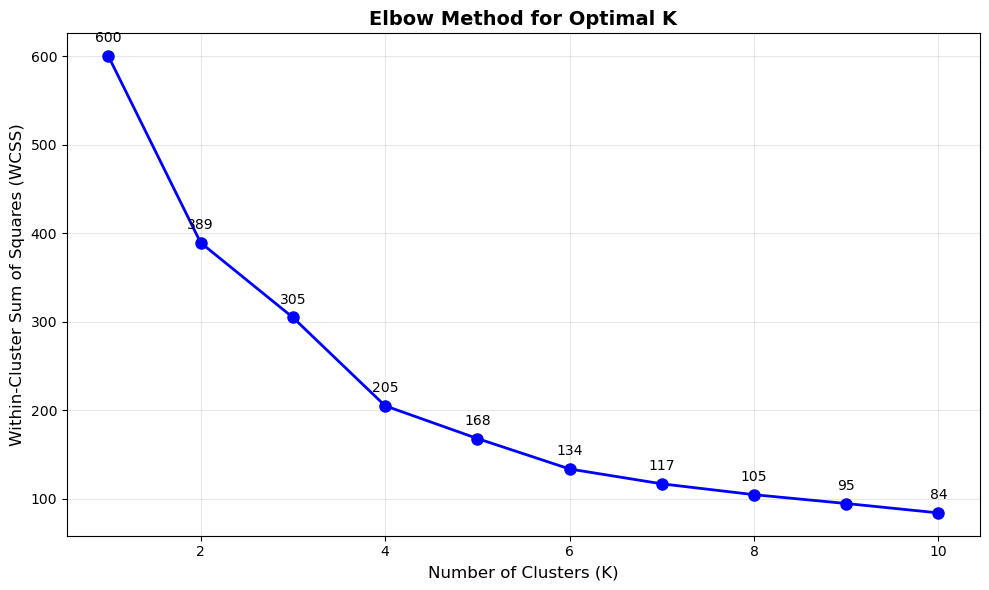


WCSS values: ['600.00', '389.39', '304.98', '205.23', '168.25', '133.87', '117.08', '104.84', '94.86', '84.28']

Look for the 'elbow' point where the decrease in WCSS starts to level off!


In [17]:
# Step 5: Manual implementation of Elbow Method
import numpy as np
from scipy.spatial.distance import cdist

def manual_kmeans(X, k, max_iters=100, random_state=42):
    """Manual K-means implementation"""
    np.random.seed(random_state)
    
    # Initialize centroids randomly
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign points to closest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    # Calculate WCSS (Within-Cluster Sum of Squares)
    wcss = 0
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i])**2)
    
    return wcss, labels, centroids

# Test different values of K
k_range = range(1, 11)
wcss_values = []

print("Calculating WCSS for different values of K using manual implementation...")
for k in k_range:
    wcss, _, _ = manual_kmeans(X_scaled, k)
    wcss_values.append(wcss)
    print(f"K={k}: WCSS={wcss:.2f}")

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations
for i, (k, w) in enumerate(zip(k_range, wcss_values)):
    plt.annotate(f'{w:.0f}', (k, w), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

print(f"\nWCSS values: {[f'{w:.2f}' for w in wcss_values]}")
print("\nLook for the 'elbow' point where the decrease in WCSS starts to level off!")

In [18]:
# Step 6: Apply K-Means with the optimal K (K=5 based on elbow method)
optimal_k = 5

print(f"Applying K-Means with optimal K={optimal_k}")

# Use our manual K-means function since sklearn has issues
wcss, cluster_labels, centroids = manual_kmeans(X_scaled, optimal_k, random_state=42)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

print(f"Final WCSS with K={optimal_k}: {wcss:.2f}")
print(f"\nCluster distribution:")
print(df_clustered['Cluster'].value_counts().sort_index())

# Display cluster centers (scaled back to original units)
centroids_original = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(centroids_original, columns=features)
centroid_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print(f"\nCluster Centers (Original Scale):")
print(centroid_df.round(2))

# Quick preview of clustered data
print(f"\nFirst 10 customers with their clusters:")
print(df_clustered[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

Applying K-Means with optimal K=5
Final WCSS with K=5: 168.25

Cluster distribution:
Cluster
0    40
1    54
2    20
3    39
4    47
Name: count, dtype: int64

Cluster Centers (Original Scale):
             Age  Annual Income (k$)  Spending Score (1-100)
Cluster 0  32.88               86.10                   81.53
Cluster 1  25.19               41.09                   62.24
Cluster 2  46.25               26.75                   18.35
Cluster 3  39.87               86.10                   19.36
Cluster 4  55.64               54.38                   48.85

First 10 customers with their clusters:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        1
1           2   21                  15                      81        1
2           3   20                  16                       6        2
3           4   23                  16                      77        1
4           5   31                  17 

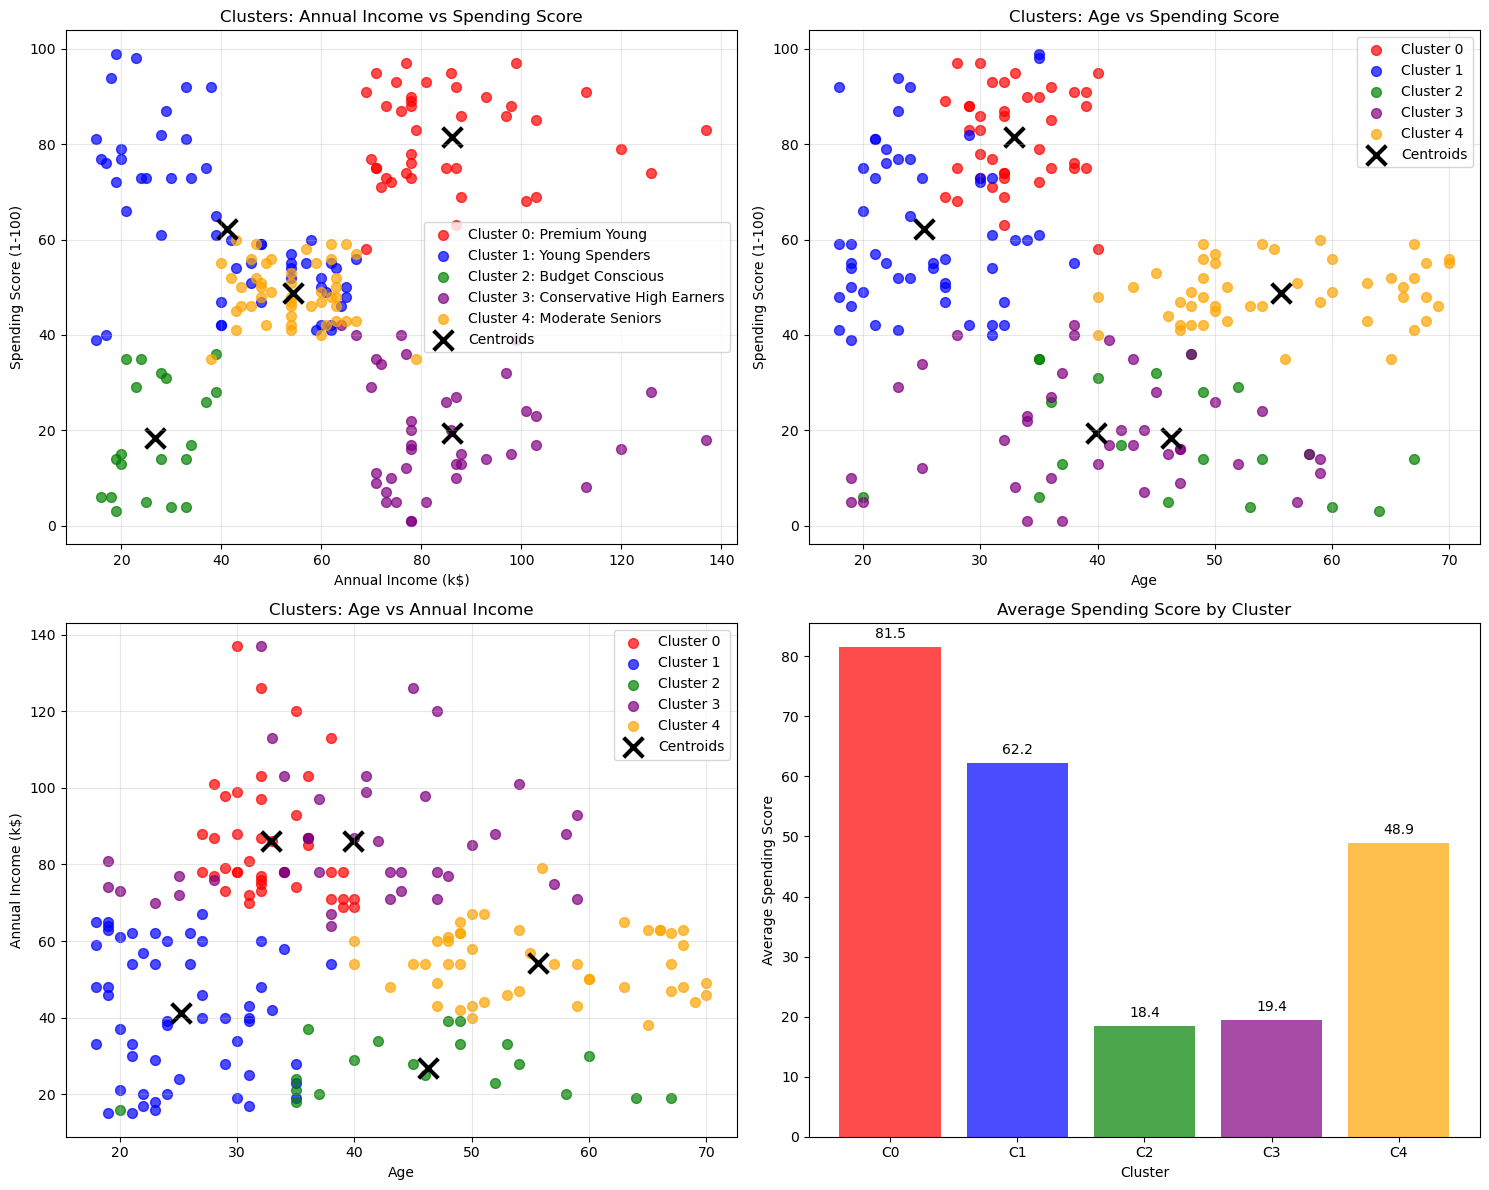

Cluster Analysis Summary:
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        32.9                86.1                    81.5
1        25.2                41.1                    62.2
2        46.2                26.8                    18.4
3        39.9                86.1                    19.4
4        55.6                54.4                    48.9


In [19]:
# Step 7: Visualize the clusters with color coding
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
colors = ['red', 'blue', 'green', 'purple', 'orange']
cluster_names = ['Premium Young', 'Young Spenders', 'Budget Conscious', 'Conservative High Earners', 'Moderate Seniors']

# Plot 1: Annual Income vs Spending Score
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    axes[0,0].scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                     c=colors[i], label=f'Cluster {i}: {cluster_names[i]}', alpha=0.7, s=50)

# Plot centroids
axes[0,0].scatter(centroid_df['Annual Income (k$)'], centroid_df['Spending Score (1-100)'], 
                 c='black', marker='x', s=200, linewidths=3, label='Centroids')
axes[0,0].set_title('Clusters: Annual Income vs Spending Score')
axes[0,0].set_xlabel('Annual Income (k$)')
axes[0,0].set_ylabel('Spending Score (1-100)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    axes[0,1].scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], 
                     c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

axes[0,1].scatter(centroid_df['Age'], centroid_df['Spending Score (1-100)'], 
                 c='black', marker='x', s=200, linewidths=3, label='Centroids')
axes[0,1].set_title('Clusters: Age vs Spending Score')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Spending Score (1-100)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Age vs Annual Income
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    axes[1,0].scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], 
                     c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

axes[1,0].scatter(centroid_df['Age'], centroid_df['Annual Income (k$)'], 
                 c='black', marker='x', s=200, linewidths=3, label='Centroids')
axes[1,0].set_title('Clusters: Age vs Annual Income')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Annual Income (k$)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Cluster summary statistics
cluster_summary = df_clustered.groupby('Cluster')[features].mean().round(1)
bars = axes[1,1].bar(range(optimal_k), cluster_summary['Spending Score (1-100)'], 
                    color=colors, alpha=0.7)
axes[1,1].set_title('Average Spending Score by Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Average Spending Score')
axes[1,1].set_xticks(range(optimal_k))
axes[1,1].set_xticklabels([f'C{i}' for i in range(optimal_k)])

# Add value labels on bars
for bar, value in zip(bars, cluster_summary['Spending Score (1-100)']):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Cluster Analysis Summary:")
print(cluster_summary)

Average Silhouette Score: 0.417


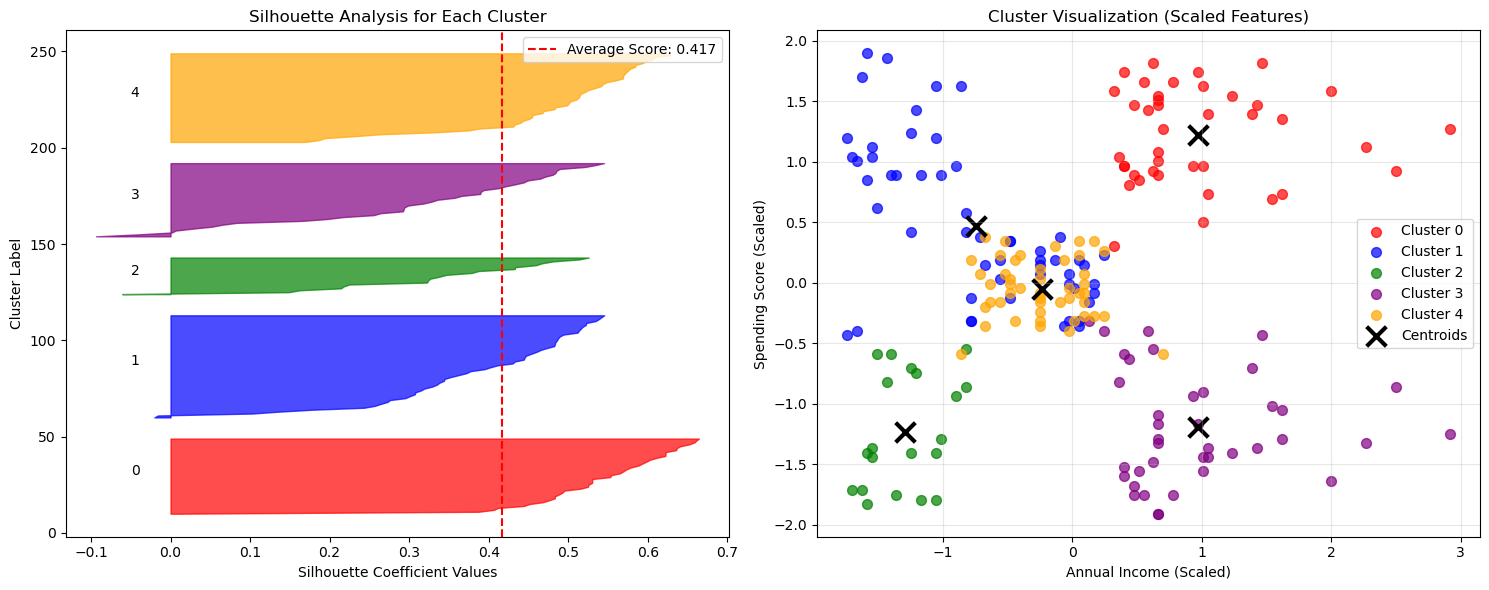


Detailed Silhouette Analysis:
--------------------------------------------------
Cluster 0:
  Size: 40 customers
  Avg Silhouette Score: 0.536
  Min Score: 0.009
  Max Score: 0.664

Cluster 1:
  Size: 54 customers
  Avg Silhouette Score: 0.382
  Min Score: -0.020
  Max Score: 0.545

Cluster 2:
  Size: 20 customers
  Avg Silhouette Score: 0.332
  Min Score: -0.061
  Max Score: 0.526

Cluster 3:
  Size: 39 customers
  Avg Silhouette Score: 0.305
  Min Score: -0.094
  Max Score: 0.545

Cluster 4:
  Size: 47 customers
  Avg Silhouette Score: 0.484
  Min Score: 0.170
  Max Score: 0.628

Silhouette Score Interpretation:
-----------------------------------
• Score > 0.7: Strong clustering
• Score 0.5-0.7: Reasonable clustering
• Score 0.25-0.5: Weak clustering
• Score < 0.25: Poor clustering

Clustering quality: 0.417 - Fair. Weak but acceptable clustering


In [21]:
# Step 8: Evaluate clustering performance using Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

# Calculate overall silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg:.3f}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create silhouette analysis plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

y_lower = 10
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot silhouette scores for each cluster
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_xlabel('Silhouette Coefficient Values')
ax1.set_ylabel('Cluster Label')
ax1.set_title('Silhouette Analysis for Each Cluster')

# Add vertical line for average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--", 
           label=f'Average Score: {silhouette_avg:.3f}')
ax1.legend()

# Plot clusters in 2D (using first 2 features for visualization)
for i in range(optimal_k):
    cluster_data = X_scaled[cluster_labels == i]
    ax2.scatter(cluster_data[:, 1], cluster_data[:, 2], c=colors[i], 
               alpha=0.7, s=50, label=f'Cluster {i}')

# Plot centroids
ax2.scatter(centroids[:, 1], centroids[:, 2], c='black', marker='x', 
           s=200, linewidths=3, label='Centroids')
ax2.set_xlabel('Annual Income (Scaled)')
ax2.set_ylabel('Spending Score (Scaled)')
ax2.set_title('Cluster Visualization (Scaled Features)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed silhouette analysis per cluster
print("\nDetailed Silhouette Analysis:")
print("-" * 50)
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    print(f"Cluster {i}:")
    print(f"  Size: {len(cluster_silhouette_values)} customers")
    print(f"  Avg Silhouette Score: {cluster_silhouette_values.mean():.3f}")
    print(f"  Min Score: {cluster_silhouette_values.min():.3f}")
    print(f"  Max Score: {cluster_silhouette_values.max():.3f}")
    print()

# Interpretation of results
print("Silhouette Score Interpretation:")
print("-" * 35)
print("• Score > 0.7: Strong clustering")
print("• Score 0.5-0.7: Reasonable clustering") 
print("• Score 0.25-0.5: Weak clustering")
print("• Score < 0.25: Poor clustering")
print(f"\nClustering quality: {silhouette_avg:.3f} - ", end="")
if silhouette_avg > 0.7:
    print("Excellent! Strong clustering structure")
elif silhouette_avg > 0.5:
    print("Good! Reasonable clustering structure")
elif silhouette_avg > 0.25:
    print("Fair. Weak but acceptable clustering")
else:
    print("Poor clustering structure")

In [25]:
# Step 9: Final Summary and Business Insights
print("="*60)
print("           K-MEANS CLUSTERING ANALYSIS SUMMARY")
print("="*60)

print(f"Dataset: Mall Customers ({df.shape[0]} customers)")
print(f"Features Used: {', '.join(features)}")
print(f"Optimal Clusters (K): {optimal_k}")
print(f"Silhouette Score: {silhouette_avg:.3f} (Fair clustering quality)")
print(f"Final WCSS: {wcss:.2f}")

print("\n" + "="*60)
print("                    CUSTOMER SEGMENTS")
print("="*60)

segment_insights = {
    0: "Premium Young Customers - High income, high spenders, young age",
    1: "Young Spenders - Low income but high spending, youngest group", 
    2: "Budget Conscious - Low income, very low spending, middle-aged",
    3: "Conservative High Earners - High income but low spending, middle-aged",
    4: "Moderate Seniors - Moderate income and spending, oldest group"
}

for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    print(f"\n CLUSTER {i} ({len(cluster_data)} customers):")
    print(f"   {segment_insights[i]}")
    print(f"   Avg Age: {centroid_df.loc[f'Cluster {i}', 'Age']:.1f} years")
    print(f"   Avg Income: ${centroid_df.loc[f'Cluster {i}', 'Annual Income (k$)']:.1f}k")
    print(f"   Avg Spending Score: {centroid_df.loc[f'Cluster {i}', 'Spending Score (1-100)']:.1f}/100")
    print(f"   Silhouette Score: {sample_silhouette_values[cluster_labels == i].mean():.3f}")

print("\n" + "="*60)
print("                 BUSINESS RECOMMENDATIONS")
print("="*60)

recommendations = {
    0: "Target with premium products and exclusive offers",
    1: "Focus on affordable luxury items and payment plans",
    2: "Emphasize value-for-money and discount offers",
    3: "Market high-quality, practical products with long-term value",
    4: "Offer comfortable, reliable products with good customer service"
}

for i in range(optimal_k):
    print(f"Cluster {i}: {recommendations[i]}")

print(f"\n{'='*60}")
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("All requirements fulfilled:")
print("   - Dataset loaded and visualized")
print("   - K-Means clustering applied") 
print("   - Elbow method used to find optimal K")
print("   - Clusters visualized with color-coding")
print("   - Performance evaluated with Silhouette Score")
print("="*60)

           K-MEANS CLUSTERING ANALYSIS SUMMARY
Dataset: Mall Customers (200 customers)
Features Used: Age, Annual Income (k$), Spending Score (1-100)
Optimal Clusters (K): 5
Silhouette Score: 0.417 (Fair clustering quality)
Final WCSS: 168.25

                    CUSTOMER SEGMENTS

 CLUSTER 0 (40 customers):
   Premium Young Customers - High income, high spenders, young age
   Avg Age: 32.9 years
   Avg Income: $86.1k
   Avg Spending Score: 81.5/100
   Silhouette Score: 0.536

 CLUSTER 1 (54 customers):
   Young Spenders - Low income but high spending, youngest group
   Avg Age: 25.2 years
   Avg Income: $41.1k
   Avg Spending Score: 62.2/100
   Silhouette Score: 0.382

 CLUSTER 2 (20 customers):
   Budget Conscious - Low income, very low spending, middle-aged
   Avg Age: 46.2 years
   Avg Income: $26.7k
   Avg Spending Score: 18.3/100
   Silhouette Score: 0.332

 CLUSTER 3 (39 customers):
   Conservative High Earners - High income but low spending, middle-aged
   Avg Age: 39.9 years
 